In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [3]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

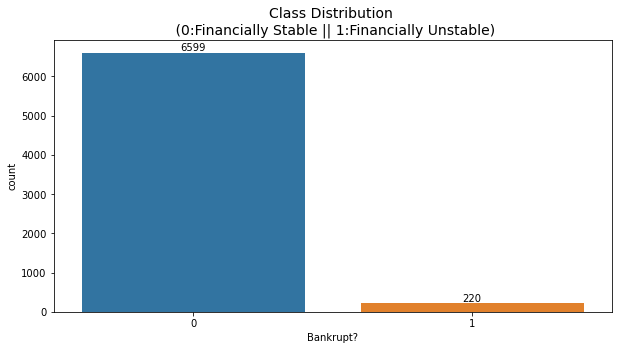

In [4]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [5]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [6]:
# divinding our dataset into training dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

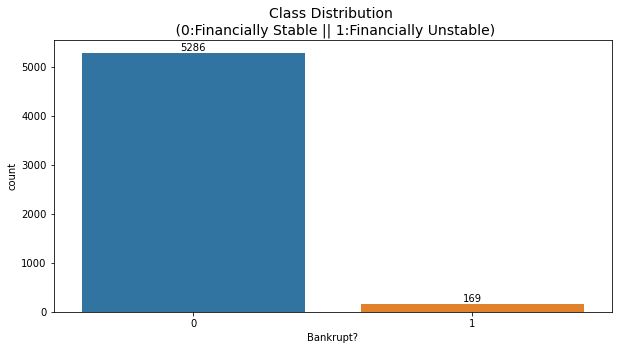

In [7]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [8]:
# divinding our dataset into testing and validation 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
smote = SMOTE(sampling_strategy=1,random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

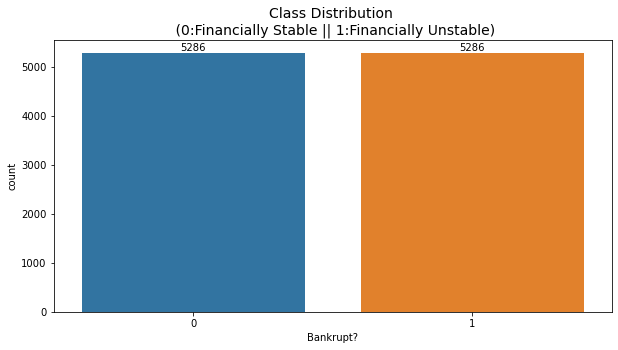

In [10]:
plt.figure(figsize = (10,5))
ax = sns.countplot(y_train_resampled)
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [11]:
clf = RandomForestClassifier(n_estimators=100,criterion = "entropy", max_depth= 3, random_state=42)

In [12]:
ada_classifier = AdaBoostClassifier(base_estimator=clf, n_estimators=50, learning_rate=1, random_state=42)

In [13]:
ada_classifier.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=42),
                   learning_rate=1, random_state=42)

In [14]:
y_val_pred = ada_classifier.predict(X_val)

In [15]:
# Evaluate the model's performance on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1_value = f1_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print("Accuracy", val_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Validation Classification Report:\n", val_report)

Accuracy 0.966275659824047
Precision 0.45161290322580644
Recall 0.7
F1 Score 0.5490196078431372
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       662
           1       0.45      0.70      0.55        20

    accuracy                           0.97       682
   macro avg       0.72      0.84      0.77       682
weighted avg       0.97      0.97      0.97       682



In [16]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[645  17]
 [  6  14]]


In [17]:
y_test_pred = ada_classifier.predict(X_test)

In [18]:
# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1_value = f1_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print("Accuracy", test_accuracy)
print("Precision", precision)
print("Recall", recall)
print("F1 Score", f1_value)
print("Test Classification Report:\n", test_report)

Accuracy 0.9516129032258065
Precision 0.46875
Recall 0.4838709677419355
F1 Score 0.47619047619047616
Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       651
           1       0.47      0.48      0.48        31

    accuracy                           0.95       682
   macro avg       0.72      0.73      0.73       682
weighted avg       0.95      0.95      0.95       682



In [19]:
conf_matrix = confusion_matrix(y_val, y_test_pred)
print("Confusion Matrix")
print(conf_matrix)

Confusion Matrix
[[633  29]
 [ 17   3]]
